# Telco Customer Dataset - Churn prediction using Random Forest

In [1]:
# install.packages("ggplot2")
# install.packages("dplyr")
# install.packages("rpart")
# install.packages("rattle")
# install.packages("rpart.plot")
# install.packages("RColorBrewer")
# install.packages("party")
# install.packages("partykit")
# install.packages("caret")
# install.packages("heuristica")
# install.packages("randomForest")


In [2]:
library(ggplot2)
library(dplyr)
library(rpart)
# library(dummies)
# library(rattle)
library(rpart.plot)
library(heuristica)
library(randomForest)
# library(RColorBrewer)
# library(party)
# library(partykit)
# library(caret)

Warning message:
“package ‘dplyr’ was built under R version 3.4.2”
Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Warning message:
“package ‘rpart’ was built under R version 3.4.3”Warning message:
“package ‘randomForest’ was built under R version 3.4.4”randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:dplyr’:

    combine

The following object is masked from ‘package:ggplot2’:

    margin



## Reading dataset

In [3]:
data.set.orig = read.csv(file="Datasets/Teleco_Cust_Attr.csv",header = T)
str(data.set.orig)
summary(data.set.orig)
prop.table(table(data.set.orig$Churn))

'data.frame':	7043 obs. of  21 variables:
 $ customerID      : Factor w/ 7043 levels "0002-ORFBO","0003-MKNFE",..: 5376 3963 2565 5536 6512 6552 1003 4771 5605 4535 ...
 $ gender          : Factor w/ 2 levels "Female","Male": 1 2 2 2 1 1 2 1 1 2 ...
 $ SeniorCitizen   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Partner         : Factor w/ 2 levels "No","Yes": 2 1 1 1 1 1 1 1 2 1 ...
 $ Dependents      : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 2 1 1 2 ...
 $ tenure          : int  1 34 2 45 2 8 22 10 28 62 ...
 $ PhoneService    : Factor w/ 2 levels "No","Yes": 1 2 2 1 2 2 2 1 2 2 ...
 $ MultipleLines   : Factor w/ 3 levels "No","No phone service",..: 2 1 1 2 1 3 3 2 3 1 ...
 $ InternetService : Factor w/ 3 levels "DSL","Fiber optic",..: 1 1 1 1 2 2 2 1 2 1 ...
 $ OnlineSecurity  : Factor w/ 3 levels "No","No internet service",..: 1 3 3 3 1 1 1 3 1 3 ...
 $ OnlineBackup    : Factor w/ 3 levels "No","No internet service",..: 3 1 3 1 1 1 3 1 1 3 ...
 $ DeviceProtection: Factor w/ 3 levels "No","

      customerID      gender     SeniorCitizen    Partner    Dependents
 0002-ORFBO:   1   Female:3488   Min.   :0.0000   No :3641   No :4933  
 0003-MKNFE:   1   Male  :3555   1st Qu.:0.0000   Yes:3402   Yes:2110  
 0004-TLHLJ:   1                 Median :0.0000                        
 0011-IGKFF:   1                 Mean   :0.1621                        
 0013-EXCHZ:   1                 3rd Qu.:0.0000                        
 0013-MHZWF:   1                 Max.   :1.0000                        
 (Other)   :7037                                                       
     tenure      PhoneService          MultipleLines     InternetService
 Min.   : 0.00   No : 682     No              :3390   DSL        :2421  
 1st Qu.: 9.00   Yes:6361     No phone service: 682   Fiber optic:3096  
 Median :29.00                Yes             :2971   No         :1526  
 Mean   :32.37                                                          
 3rd Qu.:55.00                                             


       No       Yes 
0.7346301 0.2653699 

## Data preprocessing

In [4]:
data.set.orig$customerID = NULL
sapply(data.set.orig,function(x){sum(is.na(x))})

gender    SeniorCitizen          Partner       Dependents 
               0                0                0                0 
          tenure     PhoneService    MultipleLines  InternetService 
               0                0                0                0 
  OnlineSecurity     OnlineBackup DeviceProtection      TechSupport 
               0                0                0                0 
     StreamingTV  StreamingMovies         Contract PaperlessBilling 
               0                0                0                0 
   PaymentMethod   MonthlyCharges     TotalCharges            Churn 
               0                0               11                0

### Handling nulls

In [5]:
data.set.orig$TotalCharges = ifelse(is.na(data.set.orig$TotalCharges),data.set.orig$MonthlyCharges*data.set.orig$tenure,data.set.orig$TotalCharges)

In [6]:
unique(data.set.orig$SeniorCitizen)
data.set.orig$SeniorCitizen = as.factor(data.set.orig$SeniorCitizen)

[1] 0 1

In [7]:
str(data.set.orig)
table(data.set.orig$Contract,data.set.orig$Churn)


data.set.orig$Contract = as.character(data.set.orig$Contract)
data.set = data.set.orig[data.set.orig$Contract=="Month-to-month",]
data.set.orig$Contract = as.factor(data.set.orig$Contract)
data.set$Contract = as.factor(data.set$Contract)
nrow(data.set)
str(data.set)
table(data.set$Contract,data.set$Churn)

'data.frame':	7043 obs. of  20 variables:
 $ gender          : Factor w/ 2 levels "Female","Male": 1 2 2 2 1 1 2 1 1 2 ...
 $ SeniorCitizen   : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ Partner         : Factor w/ 2 levels "No","Yes": 2 1 1 1 1 1 1 1 2 1 ...
 $ Dependents      : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 2 1 1 2 ...
 $ tenure          : int  1 34 2 45 2 8 22 10 28 62 ...
 $ PhoneService    : Factor w/ 2 levels "No","Yes": 1 2 2 1 2 2 2 1 2 2 ...
 $ MultipleLines   : Factor w/ 3 levels "No","No phone service",..: 2 1 1 2 1 3 3 2 3 1 ...
 $ InternetService : Factor w/ 3 levels "DSL","Fiber optic",..: 1 1 1 1 2 2 2 1 2 1 ...
 $ OnlineSecurity  : Factor w/ 3 levels "No","No internet service",..: 1 3 3 3 1 1 1 3 1 3 ...
 $ OnlineBackup    : Factor w/ 3 levels "No","No internet service",..: 3 1 3 1 1 1 3 1 1 3 ...
 $ DeviceProtection: Factor w/ 3 levels "No","No internet service",..: 1 3 1 3 1 3 1 1 3 1 ...
 $ TechSupport     : Factor w/ 3 levels "No","No intern

                
                   No  Yes
  Month-to-month 2220 1655
  One year       1307  166
  Two year       1647   48

[1] 3875

'data.frame':	3875 obs. of  20 variables:
 $ gender          : Factor w/ 2 levels "Female","Male": 1 2 1 1 2 1 1 2 2 2 ...
 $ SeniorCitizen   : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ Partner         : Factor w/ 2 levels "No","Yes": 2 1 1 1 1 1 2 2 1 1 ...
 $ Dependents      : Factor w/ 2 levels "No","Yes": 1 1 1 1 2 1 1 2 1 1 ...
 $ tenure          : int  1 2 2 8 22 10 28 13 49 25 ...
 $ PhoneService    : Factor w/ 2 levels "No","Yes": 1 2 2 2 2 1 2 2 2 2 ...
 $ MultipleLines   : Factor w/ 3 levels "No","No phone service",..: 2 1 1 3 3 2 3 1 3 1 ...
 $ InternetService : Factor w/ 3 levels "DSL","Fiber optic",..: 1 1 2 2 2 1 2 1 2 2 ...
 $ OnlineSecurity  : Factor w/ 3 levels "No","No internet service",..: 1 3 1 1 1 3 1 3 1 3 ...
 $ OnlineBackup    : Factor w/ 3 levels "No","No internet service",..: 3 3 1 1 3 1 1 1 3 1 ...
 $ DeviceProtection: Factor w/ 3 levels "No","No internet service",..: 1 1 1 3 1 1 3 1 3 3 ...
 $ TechSupport     : Factor w/ 3 levels "No","No intern

                
                   No  Yes
  Month-to-month 2220 1655

## Test Train Split for Month-to-month

In [8]:
set.seed(987)
sample = sample(1:nrow(data.set),size=.7*nrow(data.set))
train.data.set = data.set[sample,]
test.data.set = data.set[-sample,]
nrow(data.set)
nrow(train.data.set)
nrow(test.data.set)

[1] 3875

[1] 2712

[1] 1163

## Random Forest

In [9]:
?randomForest

In [10]:
rf.1 = randomForest( Churn ~ . , data=train.data.set,  method = "class", ntree=250, mtry = 7)
rf.1


Call:
 randomForest(formula = Churn ~ ., data = train.data.set, method = "class",      ntree = 250, mtry = 7) 
               Type of random forest: classification
                     Number of trees: 250
No. of variables tried at each split: 7

        OOB estimate of  error rate: 31.71%
Confusion matrix:
      No Yes class.error
No  1183 362   0.2343042
Yes  498 669   0.4267352

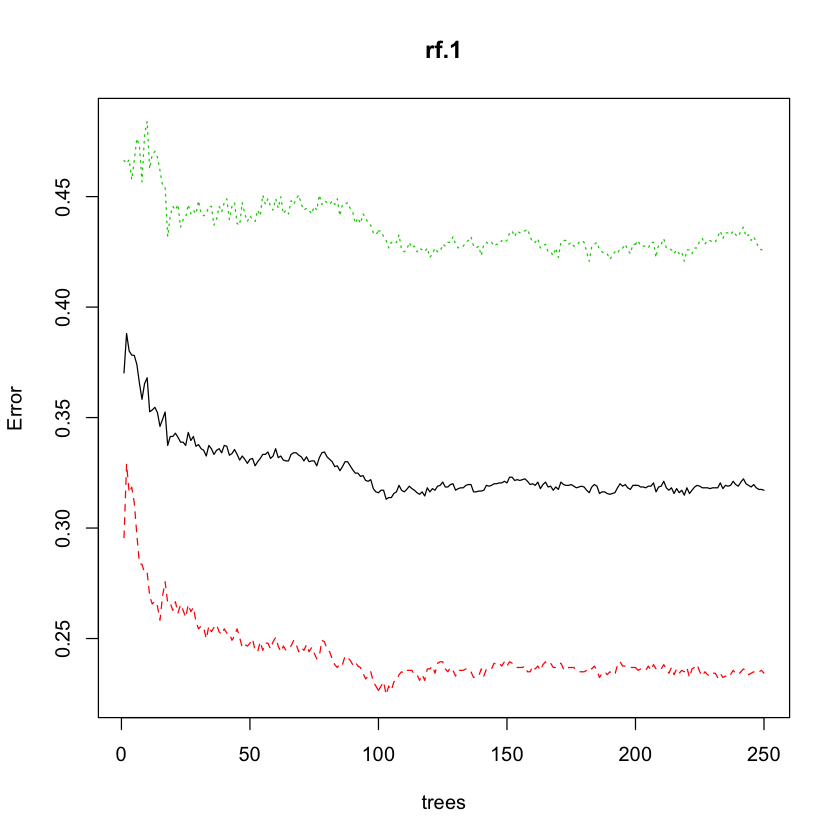

In [11]:
plot(rf.1)

In [12]:
rf.1$confusion

,No,Yes,class.error
No,1183,362,0.2343042
Yes,498,669,0.4267352


In [13]:
# table(pred.train.data.set$Churn,pred.train.data.set$Churn.pred)
tr.TN = rf.1$confusion[1]
tr.FP = rf.1$confusion[3]
tr.FN = rf.1$confusion[2]
tr.TP = rf.1$confusion[4]

tr.TN
tr.FP
tr.FN
tr.TP

tr.Accuray = (tr.TN+tr.TP)/(tr.TN+tr.TP+tr.FN+tr.FP)
tr.Precision = (tr.TP)/(tr.TP+tr.FP)
tr.Recall = (tr.TP)/(tr.TP+tr.FN)
tr.F1 = 2*tr.Precision*tr.Recall/(tr.Precision+tr.Recall)

tr.Accuray
tr.Precision
tr.Recall
tr.F1

[1] 1183

[1] 362

[1] 498

[1] 669

[1] 0.6828909

[1] 0.6488846

[1] 0.5732648

[1] 0.6087352

In [14]:
## Predictions
pred.test.data.set = as.data.frame(test.data.set$Churn)
colnames(pred.test.data.set)[1] = "Churn"
pred.test.data.set$Churn.pred = predict(rf.1,newdata = test.data.set,type="class")
# head(pred.test.data.set)
table(pred.test.data.set$Churn)
nrow(pred.test.data.set)


 No Yes 
675 488 

[1] 1163

In [15]:
table(pred.test.data.set$Churn,pred.test.data.set$Churn.pred)
tt.TN = table(pred.test.data.set$Churn,pred.test.data.set$Churn.pred)[1]
tt.FP = table(pred.test.data.set$Churn,pred.test.data.set$Churn.pred)[3]
tt.FN = table(pred.test.data.set$Churn,pred.test.data.set$Churn.pred)[2]
tt.TP = table(pred.test.data.set$Churn,pred.test.data.set$Churn.pred)[4]

tt.Precision = (tt.TP)/(tt.TP+tt.FP)
tt.Accuray = (tt.TN+tt.TP)/(tt.TN+tt.TP+tt.FN+tt.FP)
tt.Recall = (tt.TP)/(tt.TP+tt.FN)
tt.F1 = 2*tt.Precision*tt.Recall/(tt.Precision+tt.Recall)

tt.Accuray
tt.Precision
tt.Recall
tt.F1

     
       No Yes
  No  490 185
  Yes 202 286

[1] 0.6672399

[1] 0.6072187

[1] 0.5860656

[1] 0.5964546

## Test Train Split for Not Month-to-month

In [16]:
str(data.set.orig)
table(data.set.orig$Contract,data.set.orig$Churn)

data.set.orig$Contract = as.character(data.set.orig$Contract)
data.set = data.set.orig[!(data.set.orig$Contract=="Month-to-month"),]
data.set.orig$Contract = as.factor(data.set.orig$Contract)

data.set$Contract = as.factor(data.set$Contract)
nrow(data.set)
str(data.set)
table(data.set$Contract,data.set$Churn)
table(data.set$Churn)
data.set$Contract = NULL

'data.frame':	7043 obs. of  20 variables:
 $ gender          : Factor w/ 2 levels "Female","Male": 1 2 2 2 1 1 2 1 1 2 ...
 $ SeniorCitizen   : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ Partner         : Factor w/ 2 levels "No","Yes": 2 1 1 1 1 1 1 1 2 1 ...
 $ Dependents      : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 2 1 1 2 ...
 $ tenure          : int  1 34 2 45 2 8 22 10 28 62 ...
 $ PhoneService    : Factor w/ 2 levels "No","Yes": 1 2 2 1 2 2 2 1 2 2 ...
 $ MultipleLines   : Factor w/ 3 levels "No","No phone service",..: 2 1 1 2 1 3 3 2 3 1 ...
 $ InternetService : Factor w/ 3 levels "DSL","Fiber optic",..: 1 1 1 1 2 2 2 1 2 1 ...
 $ OnlineSecurity  : Factor w/ 3 levels "No","No internet service",..: 1 3 3 3 1 1 1 3 1 3 ...
 $ OnlineBackup    : Factor w/ 3 levels "No","No internet service",..: 3 1 3 1 1 1 3 1 1 3 ...
 $ DeviceProtection: Factor w/ 3 levels "No","No internet service",..: 1 3 1 3 1 3 1 1 3 1 ...
 $ TechSupport     : Factor w/ 3 levels "No","No intern

                
                   No  Yes
  Month-to-month 2220 1655
  One year       1307  166
  Two year       1647   48

[1] 3168

'data.frame':	3168 obs. of  20 variables:
 $ gender          : Factor w/ 2 levels "Female","Male": 2 2 2 2 2 1 1 2 2 1 ...
 $ SeniorCitizen   : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ Partner         : Factor w/ 2 levels "No","Yes": 1 1 1 1 2 2 1 1 2 2 ...
 $ Dependents      : Factor w/ 2 levels "No","Yes": 1 1 2 1 1 2 1 2 1 1 ...
 $ tenure          : int  34 45 62 16 58 69 52 71 12 58 ...
 $ PhoneService    : Factor w/ 2 levels "No","Yes": 2 1 2 2 2 2 2 2 2 2 ...
 $ MultipleLines   : Factor w/ 3 levels "No","No phone service",..: 1 2 1 1 3 3 1 3 1 3 ...
 $ InternetService : Factor w/ 3 levels "DSL","Fiber optic",..: 1 1 1 3 2 2 3 2 3 1 ...
 $ OnlineSecurity  : Factor w/ 3 levels "No","No internet service",..: 3 3 3 2 1 3 2 3 2 1 ...
 $ OnlineBackup    : Factor w/ 3 levels "No","No internet service",..: 1 1 3 2 1 3 2 1 2 3 ...
 $ DeviceProtection: Factor w/ 3 levels "No","No internet service",..: 3 3 1 2 3 3 2 3 2 1 ...
 $ TechSupport     : Factor w/ 3 levels "No","No in

          
             No  Yes
  One year 1307  166
  Two year 1647   48


  No  Yes 
2954  214 

In [17]:
set.seed(987)
sample = sample(1:nrow(data.set),size=.7*nrow(data.set))
train.data.set = data.set[sample,]
test.data.set = data.set[-sample,]
nrow(data.set)
nrow(train.data.set)
nrow(test.data.set)

[1] 3168

[1] 2217

[1] 951

## Random Forest

In [46]:
rf.2 = randomForest( Churn ~ . , data=train.data.set,  method = "class", ntree = 10, mtry = 6)
summary(rf.2)
rf.2

                Length Class  Mode     
call               6   -none- call     
type               1   -none- character
predicted       2217   factor numeric  
err.rate          30   -none- numeric  
confusion          6   -none- numeric  
votes           4434   matrix numeric  
oob.times       2217   -none- numeric  
classes            2   -none- character
importance        18   -none- numeric  
importanceSD       0   -none- NULL     
localImportance    0   -none- NULL     
proximity          0   -none- NULL     
ntree              1   -none- numeric  
mtry               1   -none- numeric  
forest            14   -none- list     
y               2217   factor numeric  
test               0   -none- NULL     
inbag              0   -none- NULL     
terms              3   terms  call     


Call:
 randomForest(formula = Churn ~ ., data = train.data.set, method = "class",      ntree = 10, mtry = 6) 
               Type of random forest: classification
                     Number of trees: 10
No. of variables tried at each split: 6

        OOB estimate of  error rate: 9.61%
Confusion matrix:
      No Yes class.error
No  1966  76  0.03721841
Yes  134  10  0.93055556

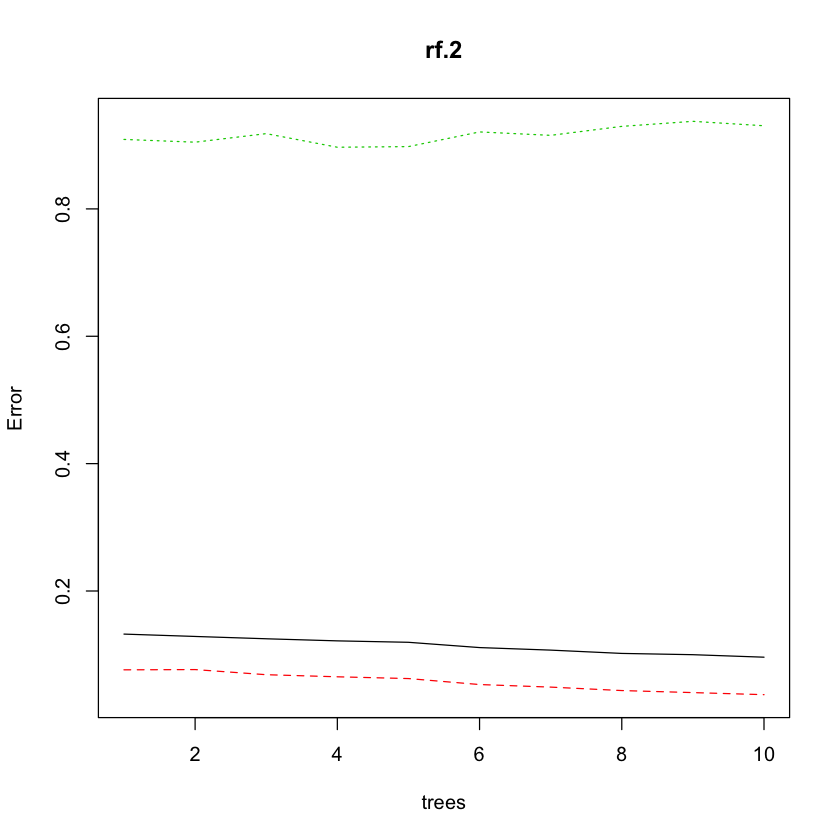

In [47]:
plot(rf.2)
# ?rpart

In [48]:
rf.2$confusion

,No,Yes,class.error
No,1966,76,0.03721841
Yes,134,10,0.93055556


In [49]:

tr.TN = rf.2$confusion[1]
tr.FP = rf.2$confusion[3]
tr.FN = rf.2$confusion[2]
tr.TP = rf.2$confusion[4]

tr.TN
tr.FP
tr.FN
tr.TP

tr.Accuray = (tr.TN+tr.TP)/(tr.TN+tr.TP+tr.FN+tr.FP)
tr.Precision = (tr.TP)/(tr.TP+tr.FP)
tr.Recall = (tr.TP)/(tr.TP+tr.FN)
tr.F1 = 2*tr.Precision*tr.Recall/(tr.Precision+tr.Recall)

tr.Accuray
tr.Precision
tr.Recall
tr.F1

[1] 1966

[1] 76

[1] 134

[1] 10

[1] 0.9039341

[1] 0.1162791

[1] 0.06944444

[1] 0.08695652

In [50]:
## Predictions
pred.test.data.set = as.data.frame(test.data.set$Churn)
colnames(pred.test.data.set)[1] = "Churn"
pred.test.data.set$Churn.pred = predict(rf.2,newdata = test.data.set,type="class")
# head(pred.test.data.set)
table(pred.test.data.set$Churn)
nrow(pred.test.data.set)


 No Yes 
884  67 

[1] 951

In [51]:
table(pred.test.data.set$Churn,pred.test.data.set$Churn.pred)
tt.TN = table(pred.test.data.set$Churn,pred.test.data.set$Churn.pred)[1]
tt.FP = table(pred.test.data.set$Churn,pred.test.data.set$Churn.pred)[3]
tt.FN = table(pred.test.data.set$Churn,pred.test.data.set$Churn.pred)[2]
tt.TP = table(pred.test.data.set$Churn,pred.test.data.set$Churn.pred)[4]

tt.TN
tt.FP
tt.FN
tt.TP

tt.Precision = (tt.TP)/(tt.TP+tt.FP)
tt.Accuray = (tt.TN+tt.TP)/(tt.TN+tt.TP+tt.FN+tt.FP)

tt.Recall = (tt.TP)/(tt.TP+tt.FN)
tt.F1 = 2*tt.Precision*tt.Recall/(tt.Precision+tt.Recall)

tt.Accuray
tt.Precision
tt.Recall
tt.F1

     
       No Yes
  No  872  12
  Yes  65   2

[1] 872

[1] 12

[1] 65

[1] 2

[1] 0.9190326

[1] 0.1428571

[1] 0.02985075

[1] 0.04938272